In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns
import shap

In [72]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

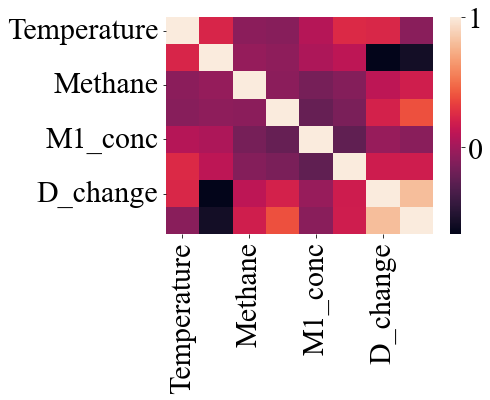

In [73]:
sns.heatmap(df.corr())

# Splitting data and working on features


In [74]:
X= df. drop(['IFT','Phase'],axis=1)

In [75]:
y=df.IFT.astype(float)

In [76]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])

In [77]:
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [78]:
x_cat

,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
X.index=x_cat.index

In [80]:
X=pd.concat([X,x_cat],axis=1)

In [81]:
X.columns

Index(['Temperature', 'Pressure', 'Methane', 'Nitrogen', 'M1_conc', 'M2_conc',
       'Salttype', 'D_change', 'Salttype_CaCl', 'Salttype_MgCl',
       'Salttype_Na2SO4', 'Salttype_NaCl', 'Salttype_NaClCaCl',
       'Salttype_NaClKCl', 'Salttype_Water'],
      dtype='object')

In [82]:
X=X.drop(["Salttype"],axis=1)

In [83]:
y.index=X.index

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [109]:
xgbr = XGBRegressor(
    reg_lambda=1,
    colsample_bytree=0.7268617365720165,
    learning_rate=0.07073171568818319,
    max_depth=7,
    min_child_weight=4,
    n_estimators=565,
    n_jobs=-1,
    subsample= 0.6285676779596696
)


In [110]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7268617365720165,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.07073171568818319,
             max_delta_step=0, max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=565, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6285676779596696,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
xgbr.score(X_train,y_train)

0.9993552656970235

In [112]:
xgbr.score(X_test,y_test)

0.9895280034175754

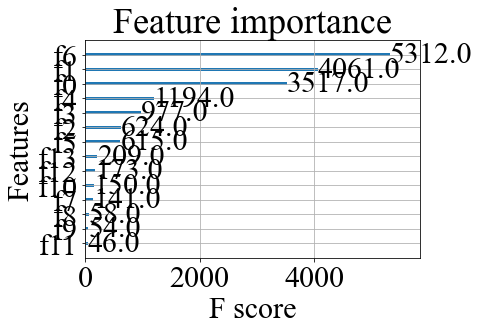

In [101]:
import xgboost as xgb
xgb.plot_importance(xgbr)
plt.show()

In [91]:
importances = xgbr.get_booster().get_score(importance_type='weight')

In [92]:
importances

{'f0': 3263.0,
 'f1': 3495.0,
 'f2': 532.0,
 'f3': 892.0,
 'f4': 1155.0,
 'f5': 593.0,
 'f6': 5181.0,
 'f7': 143.0,
 'f8': 62.0,
 'f9': 48.0,
 'f10': 150.0,
 'f11': 33.0,
 'f12': 178.0,
 'f13': 223.0}

D_change: 0.9451139024226168
Nitrogen: 0.10861719680952338
Pressure: 0.10406736852559163
Temperature: 0.09353176819505414
M2_conc: 0.050928539793334796
Methane: 0.028140919535789337
Salttype_Water: 0.022964370025511334
M1_conc: 0.018204837762365964
Salttype_NaCl: 0.0023610370296344497
Salttype_CaCl: 0.001157421731586472
Salttype_NaClKCl: 0.0008476755197608783
Salttype_MgCl: 0.0004455571993863446
Salttype_NaClCaCl: 6.304768193523916e-05
Salttype_Na2SO4: 5.5719913237439744e-05


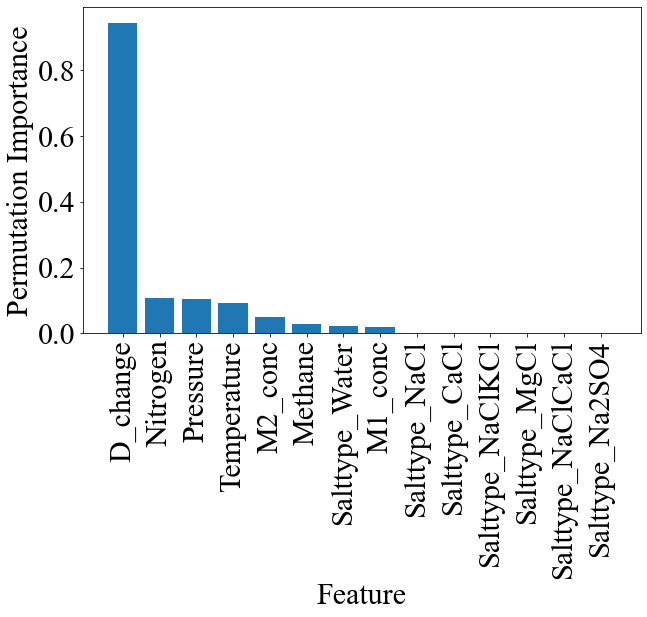

In [93]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


# Permutation importance
result = permutation_importance(xgbr, X_test, y_test, n_repeats=30, random_state=0, n_jobs=-1)

# Feature importances and their scores
feature_importance = result.importances_mean
feature_names = X.columns

# Visualization of feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

for i in sorted_idx:
    print(f'{feature_names[i]}: {feature_importance[i]}')

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.xticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.show()

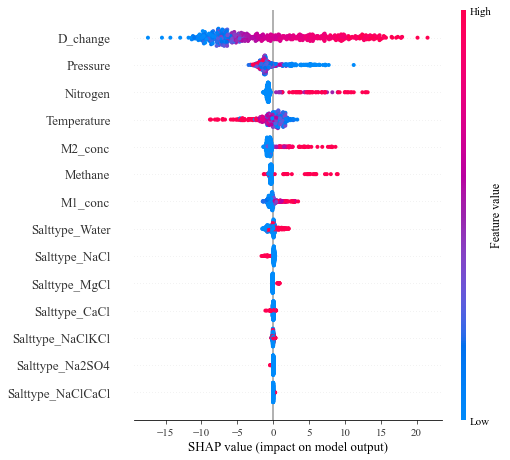

In [94]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 30  # Adjust the font size as needed

import shap
shap.initjs()

# SHAP explainer
explainer = shap.Explainer(xgbr)

# SHAP values for the test data
shap_values = explainer.shap_values(X_test)

sample_index = 0

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)

# Save plot
plt.savefig('SHAP_plot.png')

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

xgb_model = XGBRegressor()

# Create a RandomizedSearchCV object
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=50, cv=5, verbose=1, n_jobs=-1
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train)

# Print the best parameters and their corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'colsample_bytree': 0.9249033280299073, 'learning_rate': 0.022795818783570565, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 925, 'subsample': 0.6234845524615721}
Best Score:  0.9878548031573751


# Checking the Mean squared and absolute errors of the XGBR 

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs=mean_absolute_error(y_test,xgbr.predict(X_test))
mean_squared=mean_squared_error(y_test,xgbr.predict(X_test))

mean_abs_t=mean_absolute_error(y_train,xgbr.predict(X_train))
mean_squared_t=mean_squared_error(y_train,xgbr.predict(X_train))

In [26]:
mean_abs, mean_squared, mean_abs_t, mean_squared_t

(0.8330184742189805,
 1.4475096771968017,
 0.21819264621796336,
 0.0867738519123049)

In [46]:
df=pd.DataFrame(y_test) 
df

,IFT
1611,29.52
949,33.50
680,30.50
141,25.00
1620,34.50
...,...
8,27.86
218,56.70
366,43.02
963,62.10


In [47]:
d2=pd.DataFrame(xgbr.predict(X_test), columns=['IFT_pred'])
d2.index=df.index

In [48]:
df=pd.concat([df,d2],axis=1)

In [49]:
df.to_csv("XGBRegressor actual values vs Predicted values without Phase_tuned2!.csv")

In [50]:
df=pd.DataFrame(y_train) 
df

,IFT
1460,58.97
1304,35.89
687,33.80
1540,64.00
447,47.87
...,...
1142,68.52
998,55.10
1725,36.78
206,31.30


In [51]:
d2=pd.DataFrame(xgbr.predict(X_train), columns=['IFT_pred'])
d2.index=df.index

In [52]:
df=pd.concat([df,d2],axis=1)

In [53]:
df.to_csv("XGBRegressor actual values vs Predicted values without Phase_tuned_train2!.csv")

In [113]:
import joblib
import xgboost as xgb
import joblib

# Load or train your XGBoost model
# model = ...

# Specify the file path to save the model
model_file_path = "C:/Users/Paa Kwasi/Desktop/Interfacial tension research/XGBoostIFT_model.pkl"

# Save the model using joblib
joblib.dump(xgbr, model_file_path)

# Now your model is saved in the specified file


['C:/Users/Paa Kwasi/Desktop/Interfacial tension research/XGBoostIFT_model.pkl']

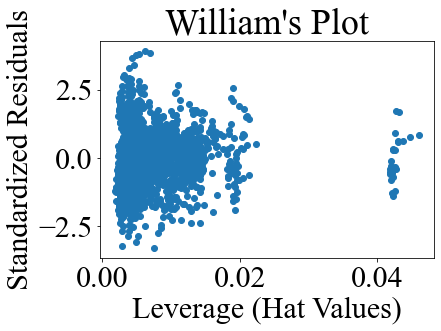

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd


# Fit linear regressor
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Leverage values
leverage = model.get_influence().hat_matrix_diag

# Standardized residuals
standardized_residuals = model.get_influence().resid_studentized_external

# DataFrame to store the data
data = pd.DataFrame({'Leverage (Hat Values)': leverage, 'Standardized Residuals': standardized_residuals})

# Excel file
data.to_excel('Williams_plot_data.xlsx', index=False)

# William's Plot
plt.scatter(leverage, standardized_residuals)
plt.xlabel("Leverage (Hat Values)")
plt.ylabel("Standardized Residuals")
plt.title("William's Plot")
plt.show()